## Setting up Colab

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select thuuike Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

import os, sys
from google.colab import drive
drive.mount('/content/drive')
# nb_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Pytorch--3D-Medical-Images-Segmentation--SALMON', nb_path)
# sys.path.insert(0,nb_path)

os.environ['TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD'] = '21329330176' # Set to 20 GB
os.environ['--NotebookApp.iopub_data_rate_limit'] = '10000000000'
os.environ['nnUNet_raw_data_base'] = '/content/drive/My Drive/Pytorch--3D-Medical-Images-Segmentation--SALMON/nnUNet_base'
os.environ['nnUNet_preprocessed' ] = '/content/drive/My Drive/Pytorch--3D-Medical-Images-Segmentation--SALMON/nnUNet_preprocessed'
os.environ['RESULTS_FOLDER'      ] = '/content/drive/My Drive/Pytorch--3D-Medical-Images-Segmentation--SALMON/nnUNet_training_output_dir'

if os.path.abspath('') == '/content':
  workspace = 'drive/My Drive/Pytorch--3D-Medical-Images-Segmentation'
  os.chdir(workspace)
os.getcwd()

Thu Jun  9 07:53:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'/content/drive/My Drive/Pytorch--3D-Medical-Images-Segmentation'

In [8]:
!python -m pip install -r requirements.txt
!python -m pip install --upgrade monai
!python -m pip install --upgrade torch 
!python -m pip install -U --user nilearn
import torch
import os
import monai

print("PyTorch version: ")
print(torch.__version__)
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is: ")
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl (831.4 MB)
  Using cached monai-0.7.0-202109240007-py3-none-any.whl (650 kB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
  Attempting uninstall: monai
    Found existing installation: monai 0.8.1
    Uninstalling monai-0.8.1:
      Successfully uninstalled monai-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached monai-0.8.1-202202162213-py3

In [12]:
%%capture
%%shell
cp main.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/main.py
cp trainer.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/trainer.py
cp configuration.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/configuration.py
cp utilities/utils.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/utils.py
cp utilities/data_utils.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/data_utils.py
cp networks/unetr.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/unetr.py
cp networks/swinUNETR.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/swinUNETR.py
cp networks/dice.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/dice.py
cp inferers/inference.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/inference/inferers.py
cp inferers/inference_export.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/inferers/inference_export.py
cp utilities/salmon_utils.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/salmon_utils.py
cp utilities/misc.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/misc.py
cp utilities/data_augmentation.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/data_augmentation.py
cp training/Data_loading.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/Data_loading.py
cp training/generate_splits.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/generate_splits.py
cp training/data_augmentation.py ../../../../../../../../usr/local/lib/python3.7/dist-packages/data_augmentation.py

After this we have to upload the nnunet_vh2020 and nnUNet_base (after preprocessing) folders to nnunet dir. 

## Training PREPROCESSING


In [ ]:
!python configuration.py 

# Training

#### Fitting LR training


In [ ]:
!python main.py -m FittingLR --batch_size=2 --logdir=FittingLR --monai --craniumExtraction True --transforms True --loss_func DiceFocal --DA_library BG --fold 0 --optim_lr 0.5e-6 --noamp --lrschedule CycleLR --optim_name sgd --roi_x 128 --roi_y 128 --roi_z 128 --preprocessing True --lowres True --save_checkpoint --data_dir=./unetr_base/raw_data/Cerebral300/ --pretrained_dir=./pretrained_models/ --pretrained_model_name='UNETR_model_best_acc.pth' --resume_ckpt #--checkpoint ./runs/Preprocessing_training/Task300_Cerebral_LowRes/fold_1/latest_model.pth  #--resume_ckpt   # 

In [10]:
!python -m pip install --upgrade torch
import torch
optim = torch.optim.RAdam


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 750.6 MB 10 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0 requires torch==1.9.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.9.0 requires torch==1.9.0, but you have torch 1.11.0 which is incompatible.


#### Not using checkpoint (pretrained model only)

### Haz un training con cycle en las que las 100 primeras epochs la lr sube

In [ ]:
!python main.py -m Training --multiOptim --batch_size=2 --logdir=MultiOptim --monai --transforms True --loss_func DiceFocal --DA_library BG --fold 1 --optim_lr 0.5e-4 --noamp --optim_name RAdam --lrschedule CycleLR --roi_x 128 --roi_y 128 --roi_z 128 --preprocessing True --lowres True --save_checkpoint --data_dir=./unetr_base/raw_data/Cerebral300/ --pretrained_dir=./pretrained_models/ --pretrained_model_name='UNETR_model_best_acc.pth' --resume_ckpt

./runs/MultiOptim/Task300_Cerebral_LowRes/fold_1/
GPU Availavility:  True
                                           
Using json dict of preprocessed cases:./unetr_base/preprocessed/Task300_Cerebral/data_dicts/dataset_lowres.json
Generating splits
                 
Fold 1
train: ['PAT00074' 'PAT00105' 'PAT00064' 'PAT00012' 'PAT00145' 'PAT00018'
 'PAT00045' 'PAT00049' 'PAT00000' 'PAT00087' 'PAT00009' 'PAT00037'
 'PAT00112' 'PAT00107' 'PAT00036' 'PAT00142' 'PAT00076' 'PAT00017'
 'PAT00122' 'PAT00010' 'PAT00055' 'PAT00115' 'PAT00066' 'PAT00101'
 'PAT00118' 'PAT00050' 'PAT00095' 'PAT00136' 'PAT00058' 'PAT00002'
 'PAT00063' 'PAT00062' 'PAT00138' 'PAT00052' 'PAT00094' 'PAT00001'
 'PAT00011' 'PAT00044' 'PAT00057' 'PAT00033' 'PAT00081' 'PAT00097'
 'PAT00046' 'PAT00022' 'PAT00016' 'PAT00048' 'PAT00047' 'PAT00075'
 'PAT00129' 'PAT00137' 'PAT00003' 'PAT00089' 'PAT00084' 'PAT00134'
 'PAT00116' 'PAT00119' 'PAT00143' 'PAT00080' 'PAT00072' 'PAT00099'
 'PAT00100' 'PAT00109' 'PAT00091' 'PAT00051' 'PAT0

## Testing

In [ ]:
!python3 main.py -m Testing --logdir=WithCranium --noamp --fold 0 --preprocessing True --transforms True --lowres True --monai --DA_library BG --roi_x 144 --roi_y 144 --roi_z 144 --infer_overlap 0.8
# !python3 main.py -m Testing --hidden_size 1035 --feature_size 32 --num_heads 15 --logdir=LRScheduler--monai --noamp --fold 1 --craniumExtraction True --preprocessing True --transforms True --lowres True --monai --DA_library BG --roi_x 128 --roi_y 128 --roi_z 128 --infer_overlap 0.7
# !python3 main.py -m Testing --logdir=Optimizer_Benchmark --noamp --fold 3 --craniumExtraction True --preprocessing True --transforms True --lowres True --monai --DA_library BG --roi_x 128 --roi_y 128 --roi_z 128 --infer_overlap 0.8

./runs/WithCranium/Task300_Cerebral_LowRes/fold_0/
GPU Availavility:  True
trueee
/usr/local/lib/python3.7/dist-packages/monai/transforms/post/array.py:182: UserWarning: `threshold_values=True/False` is deprecated, please use `threshold=value` instead.
  warnings.warn("`threshold_values=True/False` is deprecated, please use `threshold=value` instead.")
Using model located at ./runs/WithCranium/Task300_Cerebral_LowRes/fold_0/best_recall_model.pth
Starting Testing
Number of images used for Testing: 29
                                                     

Starting inference...
PAT00001.npy
torch.Size([1, 1, 363, 208, 358])
(363, 208, 358)
label shape:  (328, 333, 329)
Swapping axis: (358, 363, 208)
(358, 363, 208)
PAT00004.npy
torch.Size([1, 1, 211, 202, 208])
(211, 202, 208)
label shape:  (328, 333, 319)
Swapping axis: (208, 211, 202)
(208, 211, 202)
PAT00016.npy
torch.Size([1, 1, 211, 202, 208])
(211, 202, 208)
label shape:  (328, 333, 320)
Swapping axis: (208, 211, 202)
(208, 211, 202

In [ ]:
!python3 main.py -m Testing --logdir=Preprocessing_training --noamp --fold 0 --craniumExtraction True  --transforms True --preprocessing True --lowres True --monai --DA_library BG --roi_x 96 --roi_y 96 --roi_z 96 --infer_overlap 0.7
!python3 main.py -m Testing --logdir=Preprocessing_training --noamp --fold 1 --craniumExtraction True  --transforms True --preprocessing True --lowres True --monai --DA_library BG --roi_x 96 --roi_y 96 --roi_z 96 --infer_overlap 0.7
!python3 main.py -m Testing --logdir=Preprocessing_training --noamp --fold 3 --craniumExtraction True  --transforms True --preprocessing True --lowres True --monai --DA_library BG --roi_x 96 --roi_y 96 --roi_z 96 --infer_overlap 0.7


In [ ]:
import numpy as np
def dice(x, y):
    intersect = np.sum(np.sum(np.sum(x * y)))
    y_sum = np.sum(np.sum(np.sum(y)))
    if y_sum == 0:
        return 0.0
    x_sum = np.sum(np.sum(np.sum(x)))
    return 2 * intersect / (x_sum + y_sum)
    


configuration.py      foo_outputs  optimizers	      runs	  unetr_base
data_augmentation.py  inference    pretrained_models  test.py	  UNETR.ipynb
database_vh	      main.py	   __pycache__	      trainer.py  utilities
evaluation.py	      networks	   requirements.txt   training


In [ ]:
# !python -m pip install simpleITK
import SimpleITK as sitk
import nibabel as nib
import numpy as np
from nilearn.image import resample_to_img, load_img
caseDir_l = './unetr_base/preprocessed/Task300_Cerebral/gt_segmentations/PAT00137.nii.gz'
caseDir_npy = './unetr_base/preprocessed/Task300_Cerebral/labels_lowres/PAT00137.npy'
orig_im = './database_vh/database_labels/PAT00137.nii.gz'
labelDir = './runs/Preprocessing_training/Task300_Cerebral_LowRes/fold_1/test/labels/PAT00050.nii.gz'
# npy = sitk.GetImageFromArray(np.load(caseDir_npy))
# # spacing = npy.GetSpacing()
# original_Image = sitk.ReadImage(labelDir)
original_Image = nib.load(labelDir)
print(original_Image.header)


ModuleNotFoundError: ignored

In [ ]:
import pickle as pkl
import nibabel as nib
import torch
import nilearn
from nilearn.image import resample_to_img, load_img

caseDir_npy = './unetr_base/preprocessed/Task300_Cerebral/images_cranium/'
list_npy = sorted.os.listdir(caseDir_npy)
npy = np.load(os.path.join(caseDir_npy, list_npy[0]))

ModuleNotFoundError: ignored

In [ ]:
import torchvision.models as models
model = models.vgg16()
optimizer = torch.optim.SGD(model.parameters(),
                                        lr=1e-7,
                                        momentum=0.99,
                                        nesterov=True,
                                        weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 
                                            base_lr = 1e-7,
                                            max_lr = 0.01, 
                                            step_size_up=50, 
                                            step_size_down=None, 
                                            mode='triangular', 
                                            gamma=0.7, 
                                            scale_fn=None, 
                                            scale_mode='cycle', 
                                            cycle_momentum=True, 
                                            base_momentum=0.8, 
                                            max_momentum=0.9, 
                                            last_epoch=- 1, 
                                            verbose=False)
adam = torch.optim.Adamax(model.parameters(),
                           lr = 5e-5,
                           betas = (0.9, 0.99),
                           eps = 1e-8,
                           weight_decay = 4e-5
                           )
adamX = torch.optim.Adamax(model.parameters(),
                           lr = 5e-5,
                           betas = (0.9, 0.99),
                           eps = 1e-8,
                           weight_decay = 4e-5
                           )
adamX.state['exp_avg']

{}

In [ ]:
caseDir = './runs/Optimizer_Benchmark/Task300_Cerebral_LowRes/fold_0/best_model.pth'
import torch
checkpoint = torch.load(caseDir)['optimizer']
checkpoint.state

AttributeError: ignored

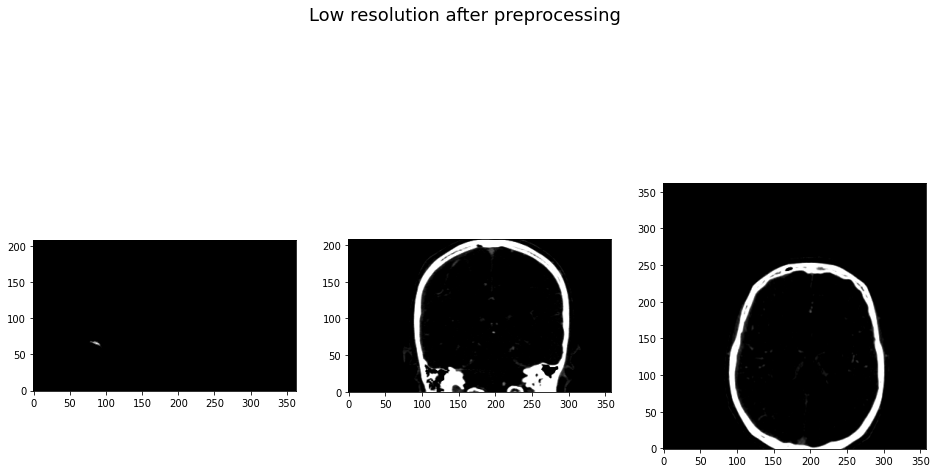

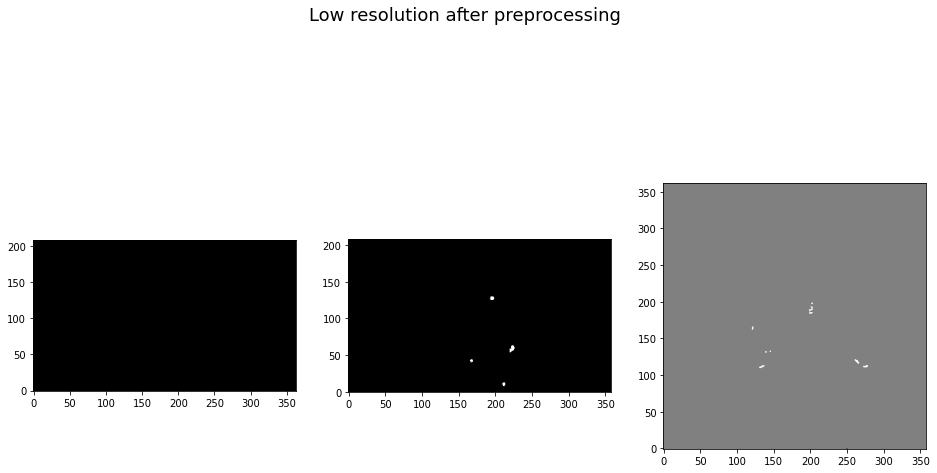

In [ ]:
from utilities.misc import show_slices
import matplotlib.pyplot as plt
import numpy as np
caseDir = './unetr_base/preprocessed/Task300_Cerebral/Data_plans_v2.1_stage0_Cranium/PAT00001.npy'
def show_i(im):
#     @widgets.interact(z=(0, 211))
#     @widgets.interact(y=(0, 225))
#     @widgets.interact(x=(0, 211))
    for i in range(1):
        slice_0 = im[:, :, 70]
        slice_1 = np.transpose(im[105, :, :])
        slice_2 = np.transpose(im[:, 100, :])
        show_slices([slice_0, slice_1, slice_2])
        plt.suptitle("Low resolution after preprocessing", fontsize=18) 

show_i(np.load(caseDir)[0])
show_i(np.load(caseDir)[1])

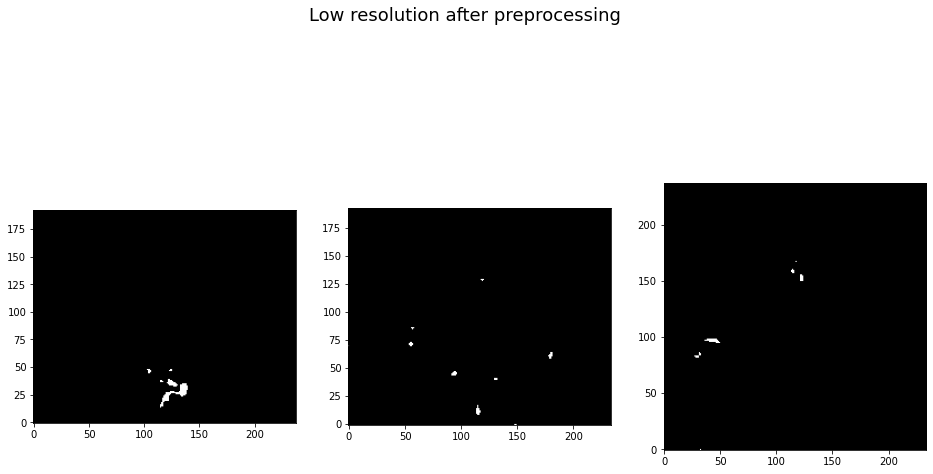

In [ ]:

# # pred_0 = post_pred(logits).squeeze()
# # print(pred_0.shape)
caseDir_l = './unetr_base/preprocessed/Task300_Cerebral/labels_lowres/PAT00131.npy'
# for case in os.listdir(caseDir_l):
label = np.load(caseDir_l)
#   # np.save(os.path.join(caseDir_l, case), label)
  # print(label.dtype)
def show_l(la):
    for i in range(1):
        slice_0 = la[:, :, 100]
        slice_1 = np.transpose(la[100, :, :])
        slice_2 = np.transpose(la[:, 100, :])
        show_slices([slice_0, slice_1, slice_2])
        plt.suptitle("Low resolution after preprocessing", fontsize=18)
show_l(label)


In [ ]:
import numpy as np
import nibabel as nib
from monai.transforms import AsDiscrete, Spacing, Resize
caseDir_GT = './unetr_base/preprocessed/Task300_Cerebral/gt_segmentations/PAT00001.nii.gz'
nifti = nib.load(caseDir_GT)
affine = nifti.affine
header = nifti.header
pixdims = header['pixdim'][1:4]
caseDir = './runs/unetr_pretrained/Task300_Cerebral_LowRes/test/case_0.pt'
tensor = torch.load(caseDir)
val_outputs = torch.softmax(tensor, 1)
pred = torch.argmax(val_outputs, axis=1).cpu().numpy().astype(np.uint8).squeeze()
# np.expand_dims(pred, 0).shape
resampling = Spacing(pixdim=pixdims, diagonal=True, mode='nearest')
label_resampled = resampling(np.expand_dims(pred, 0), affine=affine)[0][0, :]

In [ ]:
from self_attention_cv import UNETR
from monai.networks.nets import UNETR as mon_UNETR
device = torch.device("cuda:0")
num_heads = 12# normally 
embed_dim= 768 #normally
roi_size=[112, 112, 112]
pixdim=(1.5, 1.5, 2.0)

model = mon_UNETR(
      in_channels=3,
      out_channels=3,
      img_size=tuple(roi_size),
      feature_size=16,
      hidden_size=embed_dim,
      mlp_dim=3072,
      num_heads=12,
      pos_embed="perceptron",
      norm_name="instance",
      res_block=True,
      dropout_rate=0.0,
      )

In [ ]:
import torch
model_dict = model.state_dict()
for key in model.state_dict().keys():
  layer = model_dict[str(key)]
  print(layer.shape)
  
  # Generate tensor
  tensor = torch.empty(layer.shape, dtype=torch.float32, device = 'cuda')
  # Initialize weights
  if tensor.dim() < 2:
      mean, std = torch.mean(layer), torch.std(layer)
      tensor = torch.nn.init.normal_(tensor, mean, std)
  else:
      tensor = torch.nn.init.xavier_normal_(tensor, gain = torch.nn.init.calculate_gain('relu'))
  # Charge tensor to model
  model_dict[str(key)] = tensor
  

torch.Size([1, 343, 768])
torch.Size([1, 1, 768])
torch.Size([768, 12288])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([2304, 768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([2304, 768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([2304, 768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([2304, 768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 7